In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,MaxAbsScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate

XỬ LÝ DỮ LIỆU

In [5]:
# Hàm trích xuất giá trị số từ chuỗi
def extract_memory_size(string):
    match = re.search(r'(\d+\.?\d*)\s*(?:TB|GB)', string)
    if match:
        return match.group()
    else:
        return None
# Hàm trích thay đổi giá trị từ TB sang TB    
def convert_to_gb(x):
    if isinstance(x, str):
        x = x.lower()
        if 'tb' in x:
            return int(float(x.replace('tb', '')) * 1024)
        elif 'gb' in x:
            return int(float(x.replace('gb', '')))
    return x
def convert_to_float(x):
    try:
        return float(x)
    except ValueError:
        return np.nan
def try_convert_to_int(x):
    try:
        return int(x)
    except ValueError:
        return None
def fetch_processor(text):
    text = str(text)
    if 'Core i9' in text or 'Intel Core i9' in text:
        return 'Intel Core i9'
    elif 'Core i7' in text or 'Intel Core i7' in text:
        return 'Intel Core i7'
    elif 'Core i5' in text or 'Intel Core i5' in text:
        return 'Intel Core i5' 
    elif 'Core i3' in text or 'Intel Core i3' in text:
        return 'Intel Core i3'  
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        elif 'AMD' in text or 'Ryzen' in text:
            return 'AMD Processor'
        elif 'celeron' in text or 'Celeron' in text:
            return 'Celeron Processor'
        elif 'Pentium' in text or 'Pentium' in text:
            return 'Pentium Processor'
        elif 'Athlon' in text or 'athlon' in text:
            return 'Athlon Processor'
        else :
            return None
def fetch_gpu(text):
    text = str(text)
    if 'Intel' in text or 'UHD' in text or  'HD' in text:
        return 'Intel '
    elif 'AMD' in text or 'Radeon' in text:
        return 'AMD'
    elif 'NVIDIA' in text or 'GTX' in text or 'RTX' in text:
        return 'NVIDIA'   
    else:
        return None
def fetch_opsys(text):
    text = str(text)
    if 'Chrome' in text:
        return 'Chrome OS'
    elif 'Windows' in text:
        return 'Windows'  
    else:
        return 'Others/Linux/Mac OS'
def fetch_company(text):
    text = str(text)
    if 'Dell' in text or 'DELL' in text:
        return 'Dell'
    elif 'MSI' in text:
        return 'MSI'
    elif 'HP' in text or 'Hp' in text:
        return 'HP'   
    elif 'Acer' in text or 'ACER' in text:
        return 'Acer'   
    elif 'Razer' in text or 'RAZER' in text:
        return 'Razer'
    elif 'Apple' in text:
        return 'Apple'
    elif 'Lenovo' in text or 'LENOVO' in text:
        return 'Lenovo'
    elif 'ASUS' in text or 'Asus' in text or 'VivoBook' in text:
        return 'Asus'
    else:
        return 'Other'

LÀM SẠCH DỮ LIỆU

In [6]:
def clean_all_data_small(df):
  df = df.applymap(lambda x: x.replace('\u200e', '') if isinstance(x, str) else x)
  df['Inches'] = df['Inches'].str.replace('Inches','')
  df['Inches'] = df['Inches'].apply(convert_to_float)
  df['Screen_Resolution'] = df['Screen_Resolution'].str.replace('Pixels','').str.strip()
  df['RAM'] = df['RAM'].str.extract('(\d+)')
  df['RAM'] = df['RAM'].astype(float).fillna(0).astype(int)
  df['Weights'] = df['Weights'].str.replace('pounds', '').str.replace('ounces', '').str.strip()
  df['Weights'] = df['Weights'].astype(float)
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
  df['Memory'] = df['Memory'].replace(["HDD", "SSD","Emmc","Flash Storage","Solid State Hard Drive","MB","flash_memory_solid_state","Serial ATA-600","Embedded MultiMediaCard"], '')
  df.loc[df['Memory'].str.contains('256GB PCIe M.2 SSD \+ 1TB \(\+8GB SSHD\) Hybrid Drive'), 'Memory'] = '1256GB'
  df['Memory'] = df['Memory'].apply(extract_memory_size)
  df['Memory'] = df['Memory'].apply(convert_to_gb)
  df['OpSys'] = df['OpSys'].apply(fetch_opsys)
  df['Price'] = df['Price'].str.replace(',', '')
  df['Price'] = df['Price'].str.replace('$', '').str.replace('From', '').replace(',', '.').str.strip()
  df['Price'].replace('Unavailable', np.nan, inplace=True)
  df['Price'] = df['Price'].astype(float)
  df['Company'] = df['Company'].apply(fetch_company)
  return df

def clean_all_data_big(df):
  df = df.applymap(lambda x: x.replace('\u200e', '') if isinstance(x, str) else x)
  df_big['Inches'] = df_big['Inches'].str.replace('1 Centimeters','1')
  df_big['Inches'] = df_big['Inches'].str.replace('15.6 Feet','15.6')
  df['Inches'] = df['Inches'].apply(convert_to_float)
  df['RAM'] = df['RAM'].astype(float).fillna(0).astype(int)
  df['Weights'] = df['Weights'].astype(float)
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
  df['Memory'] = df['Memory'].replace(["HDD", "SSD","Emmc","Flash Storage","Solid State Hard Drive","MB","flash_memory_solid_state","Serial ATA-600","Embedded MultiMediaCard"], '')
  df.loc[df['Memory'].str.contains('256GB PCIe M.2 SSD \+ 1TB \(\+8GB SSHD\) Hybrid Drive'), 'Memory'] = '1256GB'
  df['Memory'] = df['Memory'].apply(extract_memory_size)
  df['Memory'] = df['Memory'].apply(convert_to_gb)
  df['OpSys'] = df['OpSys'].apply(fetch_opsys)
  df['Company'] = df['Company'].apply(fetch_company)
  return df

TẠO ĐẶC TRƯNG MỚI

In [7]:
def create_new_feature(df):  
  df['X_res'] = df['Screen_Resolution'].str.split('[xX*]').str[0].str.strip()
  df['Y_res'] = df['Screen_Resolution'].str.split('[xX*]').str[1].str.strip()
  df['X_res'] = df['X_res'].apply(try_convert_to_int)
  df['Y_res'] = df['Y_res'].apply(try_convert_to_int)
  df.drop(columns=['Screen_Resolution'],inplace=True)
  df['Gaming'] = df['Name'].str.contains('Alienware|Gaming|Predator|ROG|MSI', case=False).astype(int)
  df['Touchscreen'] = df['Name'].str.contains('Touchscreen', case=False).astype(int)
  df.drop(columns=['Name'],inplace=True)
  
  return df

# hàm này có xử lý thêm CPU Brand và Gpu brand để phục vụ cho kỹ thuật Label Encoding
def create_new_feature_1(df):  
  df['X_res'] = df['Screen_Resolution'].str.split('[xX*]').str[0].str.strip()
  df['Y_res'] = df['Screen_Resolution'].str.split('[xX*]').str[1].str.strip()
  df['X_res'] = df['X_res'].apply(try_convert_to_int)
  df['Y_res'] = df['Y_res'].apply(try_convert_to_int)
  df.drop(columns=['Screen_Resolution'],inplace=True)
  df['Cpu Brand'] = df['CPU'].apply(fetch_processor)
  df.drop(columns=['CPU'],inplace=True)
  df['Gpu brand'] = df['GPU'].apply(fetch_gpu)
  df.drop(columns=['GPU'],inplace=True)
  df['Gaming'] = df['Name'].str.contains('Alienware|Gaming|Predator|ROG|MSI', case=False).astype(int)
  df['Touchscreen'] = df['Name'].str.contains('Touchscreen', case=False).astype(int)
  df.drop(columns=['Name'],inplace=True)
  return df

def create_feature_ppi(df): 
  df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
  return df

XỬ LÍ DỮ LIỆU TRỐNG

In [3]:
def Impute_missing_value(df,impute_method,df_train = None):
    if df_train is None:
        if impute_method == 'mean':
            df = df.fillna(df.mean())
        elif impute_method == 'mode':
            df= df.fillna(df.mode()[0])
        elif impute_method == 'median':
            df = df.fillna(df.median())
    else:
        if impute_method == 'mean':
            df = df.fillna(df_train.mean())
        elif impute_method == 'mode':
            df = df.fillna(df_train.mode()[0])
        elif impute_method == 'median':
            df = df.fillna(df_train.median())
    return df

ĐỌC TẬP DỮ LIỆU VÀO VÀ TIẾN HÀNH LÀM SẠCH DỮ LIỆU

In [7]:
df_small = pd.read_csv('./raw data/1000_sampled_data.csv')
df_small = clean_all_data_small(df_small)
df_small['Price'] = Impute_missing_value(df_small['Price'],'mean')

In [132]:
df_big = pd.read_csv('./raw data/10000_data.csv')
df_big = clean_all_data_big(df_big)


In [161]:
df_big.sample(100)

,Company,Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,OpSys,Weights,Price
4004,Lenovo,"Lenovo ThinkPad P15v Gen 3, i7-12700H vPro, 15...",15.6,1920 x 1080,Core i7,16,512.0,NVIDIA T600 4GB,Windows,5.00,1599.99
10093,Dell,DELL Grade A Laptop Latitude Intel Core i5 7th...,15.6,1920 x 1080,Intel Core i5 7th Gen,8,512.0,Intel HD Graphics 620,Windows,4.40,519.99
6035,HP,"2022 HP Pavilion X360 2-in-1 Laptop 14"" FHD IP...",14.0,1920 x 1080,Core i5 Family,8,256.0,Intel Iris Xe Graphics,Windows,7.00,679.00
4146,Other,2022 Ideapad 3i Touch-Screen Laptops for Colle...,15.6,1366 x 768,Intel Core i3,12,512.0,Intel,Windows,3.74,499.99
9879,Dell,DELL Grade B Laptop Latitude Intel Core i7 8th...,15.6,1920 x 1080,Intel Core i7 8th Gen,16,512.0,Intel UHD Graphics 620,Windows,NaN,609.99
...,...,...,...,...,...,...,...,...,...,...,...
3678,Lenovo,Lenovo ThinkPad X1 Carbon Gen 10 21CB009NUS 14...,14.0,1920 x 1200,Core i5,16,512.0,Intel Iris Xe Graphics,Windows,4.35,1623.46
1255,Lenovo,"Lenovo Legion 5 15.6"" FHD Gaming Laptop Comput...",15.6,1920x1080,AMD Ryzen 7 5800H,32,2048.0,NVIDIA GeForce,Windows,4.19,1899.00
8189,Dell,"Newest Dell Inspiron 15.6 inch Laptop, 10th Ge...",15.0,1366 x 768,Core i5,8,256.0,Intel UHD Graphics,Windows,NaN,568.76
6914,MSI,"MSI Creator 15 A10SEV-001 15.6"" UHD 4K Ultra T...",15.6,3840 x 2160,Intel Core i7,32,1024.0,NVIDIA GeForce RTX 2060,Windows,4.63,3499.00


In [12]:
df_small.head()

,Company,Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,OpSys,Weights,Price
0,HP,"HP High Performance Laptop 2023, 17.3"" FHD IPS...",17.3,1920 x 1080,Core i7 Family,16,1024.0,Intel Iris Xe Graphics,Windows,7.90,1089.181153
1,Dell,Dell Latitude 5400 Chrome CEL_2-4305U 4GB 64GB...,14.0,1366 x 768,Celeron,4,64.0,Intel HD Graphics 4400,Chrome OS,4.99,546.120000
2,Dell,Dell 2023 Inspiron I5402 14 inch FHD Non-Touch...,14.0,1920 x 1080,Core i5 Family,12,512.0,Intel Iris Xe Graphics,Windows,7.00,1089.181153
3,Dell,"Dell Latitude 5410 14"" Notebook - Full HD - 19...",14.0,1920 x 1080,Intel Core i5,8,256.0,Intel UHD Graphics 620,Windows,5.30,499.000000
4,Dell,"Dell Latitude 5310 13.3"" Touchscreen 2 in 1 No...",13.3,1920 x 1080,Intel Core i7,16,256.0,Intel HD Graphics 620,Windows,2.91,899.000000


In [ ]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1000 non-null   object 
 1   Name               1000 non-null   object 
 2   Inches             976 non-null    float64
 3   Screen_Resolution  868 non-null    object 
 4   CPU                953 non-null    object 
 5   RAM                1000 non-null   int64  
 6   Memory             891 non-null    float64
 7   GPU                843 non-null    object 
 8   OpSys              1000 non-null   object 
 9   Weights            948 non-null    float64
 10  Price              1000 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 86.1+ KB


CHỌN KỸ THUẬT XỬ LÝ DỬ LIỆU TRỐNG TỐT NHẤT CHO MEMORY,INCHES,RAM,WEIGHTS

In [ ]:
from sklearn.model_selection import train_test_split
X_small = df_small[['Memory', 'Inches', 'RAM', 'Weights']]
y_small = np.log(df_small['Price'])
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_small,y_small,test_size=0.3)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(X_test_s, y_test_s, test_size=0.5, random_state=2)

LẶP QUA TỪNG KỸ THUẬT VÀ IN AVERAGE R2 SCORE CỦA MỖI KỸ THUẬT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

impute_methods = ['mean', 'median', 'mode']
result1 = pd.DataFrame(columns=['Memory', 'Inches', 'RAM', 'Weights', 'Average r2 score'])

for tech in impute_methods:
    X_new = X_small.copy()
    y_new = y_small.copy()
    X_new['Memory'] = Impute_missing_value(X_new['Memory'], tech)
    X_new['Inches'] = Impute_missing_value(X_new['Inches'], tech)
    X_new['RAM'] = Impute_missing_value(X_new['RAM'], tech)
    X_new['Weights'] = Impute_missing_value(X_new['Weights'], tech)

    model = RandomForestRegressor(
        random_state=3
    )

    results = cross_validate(model, X_new, y_new, cv=5, scoring='r2')
    average_r2 = np.mean(results['test_score'])

    row = {
        'Memory': tech,
        'Inches': tech,
        'RAM': tech,
        'Weights': tech,
        'Average r2 score': average_r2
    }
    result1 = result1.append(row, ignore_index=True)
print(result1.to_string(index=False))

<ipython-input-31-77ac7b5dc836>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)
<ipython-input-31-77ac7b5dc836>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


Memory Inches    RAM Weights  Average r2 score
  mean   mean   mean    mean          0.472787
median median median  median          0.467723
  mode   mode   mode    mode          0.465214


<ipython-input-31-77ac7b5dc836>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


KỸ THUẬT MEAN CÓ AVERAGE R2 SCORE CAO NHẤT NÊN TA SỬ DỤNG NÓ

In [ ]:
df_small['Memory'] = Impute_missing_value(df_small['Memory'], 'mean')
df_small['Inches'] = Impute_missing_value(df_small['Inches'], 'mean')
df_small['RAM'] = Impute_missing_value(df_small['RAM'], 'mean')
df_small['Weights'] = Impute_missing_value(df_small['Weights'], 'mean')

In [ ]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1000 non-null   object 
 1   Name               1000 non-null   object 
 2   Inches             1000 non-null   float64
 3   Screen_Resolution  868 non-null    object 
 4   CPU                953 non-null    object 
 5   RAM                1000 non-null   int64  
 6   Memory             1000 non-null   float64
 7   GPU                843 non-null    object 
 8   OpSys              1000 non-null   object 
 9   Weights            1000 non-null   float64
 10  Price              1000 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 86.1+ KB


TẠO ĐẶC TRƯNG MỚI CHO CỘT NAME, SCREEN_RESOLUTION RỒI XỬ LÝ DỮ LIỆU TRỐNG CHO ĐẶC TRƯNG ĐÓ

In [ ]:
from sklearn.model_selection import train_test_split
X_small = df_small[['Memory', 'RAM', 'Weights','Name', 'Inches', 'Screen_Resolution']]
y_small = np.log(df_small['Price'])
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_small,y_small,test_size=0.3)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(X_test_s, y_test_s, test_size=0.5, random_state=3)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

impute_methods = ['mean', 'median', 'mode']
result1 = pd.DataFrame(columns=['Memory', 'Inches', 'RAM', 'Weights', 'Name','Screen_Resolution','Average r2 score'])

for tech in impute_methods:
    X_new = X_small.copy()
    y_new = y_small.copy()
    # Tạo đặc trưng mới
    X_new = create_new_feature(X_new)
    # Xử lý dữ liệu trống cho các đặc trưng đó
    X_new['X_res'] = Impute_missing_value(X_new['X_res'], tech)
    X_new['Y_res'] = Impute_missing_value(X_new['Y_res'], tech)
    X_new['Gaming'] = Impute_missing_value(X_new['Gaming'], tech)
    X_new['Touchscreen'] = Impute_missing_value(X_new['Touchscreen'], tech)
    X_new['ppi'] = Impute_missing_value(X_new['ppi'], tech)

    model = RandomForestRegressor(
        random_state=3
    )
    results = cross_validate(model, X_new, y_new, cv=5, scoring='r2')
    average_r2 = np.mean(results['test_score'])

    row = {
        'X_res': tech,
        'Y_res': tech,
        'Gaming': tech,
        'Touchscreen': tech,
        'ppi': tech,
        'Average r2 score': average_r2
    }
    result1 = result1.append(row, ignore_index=True)
print(result1.to_string(index=False))

<ipython-input-36-430e6e4ae825>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)
<ipython-input-36-430e6e4ae825>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


Memory Inches RAM Weights Name Screen_Resolution  Average r2 score  X_res  Y_res Gaming Touchscreen    ppi
   NaN    NaN NaN     NaN  NaN               NaN          0.510701   mean   mean   mean        mean   mean
   NaN    NaN NaN     NaN  NaN               NaN          0.504566 median median median      median median
   NaN    NaN NaN     NaN  NaN               NaN          0.504566   mode   mode   mode        mode   mode


<ipython-input-36-430e6e4ae825>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


KỸ THUẬT MEAN CÓ AVERAGE R2 SCORE CAO NHẤT NÊN TA SỬ DỤNG NÓ

In [ ]:
from sklearn.model_selection import train_test_split
X_small = df_small.drop(columns=['Price'])
y_small = np.log(df_small['Price'])
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_small,y_small,test_size=0.3, random_state = 2)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(X_test_s, y_test_s, test_size=0.5, random_state=2)

KỸ THUẬT LABEL ENCODING 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

result1 = pd.DataFrame(columns=['Company','Memory', 'CPU', 'GPU', 'Inches', 'RAM', 'Weights', 'Name','Screen_Resolution','OpSys', 'Average r2 score'])
X_new = X_small.copy()
y_new = y_small.copy()
# Tạo đặc trưng mới
X_new = create_new_feature_1(X_new)
# Xử lý dữ liệu trống cho các đặc trưng đó
X_new['X_res'] = Impute_missing_value(X_new['X_res'], 'mean')
X_new['Y_res'] = Impute_missing_value(X_new['Y_res'], 'mean')
X_new['Gaming'] = Impute_missing_value(X_new['Gaming'], 'mean')
X_new['Touchscreen'] = Impute_missing_value(X_new['Touchscreen'], 'mean')
X_new['ppi'] = Impute_missing_value(X_new['ppi'], 'mean')

# Áp dụng kỹ thuật Label Encoding
le = LabelEncoder()
X_new['Company'] = le.fit_transform(X_new['Company'])
X_new['OpSys'] = le.fit_transform(X_new['OpSys'])
X_new['Cpu Brand'] = le.fit_transform(X_new['Cpu Brand'])
X_new['Gpu brand'] = le.fit_transform(X_new['Gpu brand'])

X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1000 non-null   int64  
 1   Inches       1000 non-null   float64
 2   RAM          1000 non-null   int64  
 3   Memory       1000 non-null   float64
 4   OpSys        1000 non-null   int64  
 5   Weights      1000 non-null   float64
 6   X_res        1000 non-null   float64
 7   Y_res        1000 non-null   float64
 8   Cpu Brand    1000 non-null   int64  
 9   Gpu brand    1000 non-null   int64  
 10  Gaming       1000 non-null   int64  
 11  Touchscreen  1000 non-null   int64  
 12  ppi          1000 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 101.7 KB


In [ ]:
df_big = pd.read_csv('10000_data.csv') 
df_big['Inches'] = df_big['Inches'].str.replace('1 Centimeters','1')
df_big['Inches'] = df_big['Inches'].str.replace('15.6 Feet','15.6')
df_big['Memory'] = df_big['Inches'].str.replace('GB','').str.replace('TB','').str.strip()
df_big['Inches'] = df_big['Inches'].astype(float)
df_big['Memory'] = df_big['Memory'].astype(float)

<ipython-input-39-03045924ce77>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_big['Inches'] = df_big['Inches'].str.replace('15.6 Feet','15.6')


In [ ]:
df_big.head()

,Company,Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,OpSys,Weights,Price
0,ASUS,"ASUS Chromebook C424, 14.0"" 180 Degree FHD Nan...",14.0,1920x1080,Celeron N4020,4.0,14.0,Intel UHD Graphics 600,Chrome OS,5.16,249.990000
1,Acer,Acer Chromebook Spin 314 Convertible Laptop | ...,14.0,1366x768,Pentium,8.0,14.0,Intel UHD Graphics,Chrome OS,3.42,399.990000
2,HP,"HP 2022 14"" IPS FHD Chromebook, Ryzen 3 Proces...",14.0,1920 x 1080,Ryzen 3,4.0,14.0,NaN,Chrome OS,4.75,169.990000
3,Dell,"Dell Vostro 7510 Business Laptop, 15.6"" FHD Di...",15.6,1920 x 1080,Core i7 Family,16.0,15.6,NVIDIA GeForce RTX 3050,Windows 11 Pro,6.00,963.926015
4,SAMSUNG,SAMSUNG 15.6” Galaxy Book2 Pro with Intel ARC ...,15.6,1920 x 1080,Core i7,1.0,15.6,Intel ARC A350M,Windows,2.45,1899.990000


In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            10305 non-null  object 
 1   Name               10305 non-null  object 
 2   Inches             10190 non-null  float64
 3   Screen_Resolution  9281 non-null   object 
 4   CPU                9992 non-null   object 
 5   RAM                10241 non-null  float64
 6   Memory             10190 non-null  float64
 7   GPU                8675 non-null   object 
 8   OpSys              10083 non-null  object 
 9   Weights            9068 non-null   float64
 10  Price              10305 non-null  float64
dtypes: float64(5), object(6)
memory usage: 885.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X_big = df_big[['Memory', 'Inches', 'RAM', 'Weights']]
y_big = np.log(df_big['Price'])
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_big,y_big,test_size=0.3,random_state=2)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

impute_methods = ['mean', 'median', 'mode']
result1 = pd.DataFrame(columns=['Memory', 'Inches', 'RAM', 'Weights', 'Average r2 score'])

for tech in impute_methods:
    X_new = X_big.copy()
    y_new = y_big.copy()
    X_new['Memory'] = Impute_missing_value(X_new['Memory'], tech)
    X_new['Inches'] = Impute_missing_value(X_new['Inches'], tech)
    X_new['RAM'] = Impute_missing_value(X_new['RAM'], tech)
    X_new['Weights'] = Impute_missing_value(X_new['Weights'], tech)

    model = RandomForestRegressor(
        random_state=3
    )

    results = cross_validate(model, X_new, y_new, cv=5, scoring='r2')
    average_r2 = np.mean(results['test_score'])

    row = {
        'Memory': tech,
        'Inches': tech,
        'RAM': tech,
        'Weights': tech,
        'Average r2 score': average_r2
    }
    result1 = result1.append(row, ignore_index=True)
print(result1.to_string(index=False))

<ipython-input-43-90927f21a6ea>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)
<ipython-input-43-90927f21a6ea>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


Memory Inches    RAM Weights  Average r2 score
  mean   mean   mean    mean          0.460420
median median median  median          0.447937
  mode   mode   mode    mode          0.464948


<ipython-input-43-90927f21a6ea>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


In [ ]:
df_big['Memory'] = Impute_missing_value(df_big['Memory'], 'mode')
df_big['Inches'] = Impute_missing_value(df_big['Inches'], 'mode')
df_big['RAM'] = Impute_missing_value(df_big['RAM'], 'mode')
df_big['Weights'] = Impute_missing_value(df_big['Weights'], 'mode')

In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            10305 non-null  object 
 1   Name               10305 non-null  object 
 2   Inches             10305 non-null  float64
 3   Screen_Resolution  9281 non-null   object 
 4   CPU                9992 non-null   object 
 5   RAM                10305 non-null  float64
 6   Memory             10305 non-null  float64
 7   GPU                8675 non-null   object 
 8   OpSys              10083 non-null  object 
 9   Weights            10305 non-null  float64
 10  Price              10305 non-null  float64
dtypes: float64(5), object(6)
memory usage: 885.7+ KB


In [ ]:
from sklearn.model_selection import train_test_split
X_big = df_big[['Memory', 'RAM', 'Weights','Name', 'Inches', 'Screen_Resolution']]
y_big = np.log(df_big['Price'])
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_big,y_big,test_size=0.3,random_state=2)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

impute_methods = ['mean', 'median', 'mode']
result1 = pd.DataFrame(columns=['Memory', 'Inches', 'RAM', 'Weights', 'Name','Screen_Resolution','Average r2 score'])

for tech in impute_methods:
    X_new = X_big.copy()
    y_new = y_big.copy()
    X_new = create_new_feature(X_new)
    X_new['X_res'] = Impute_missing_value(X_new['X_res'], tech)
    X_new['Y_res'] = Impute_missing_value(X_new['Y_res'], tech)
    X_new['Gaming'] = Impute_missing_value(X_new['Gaming'], tech)
    X_new['Touchscreen'] = Impute_missing_value(X_new['Touchscreen'], tech)
    X_new['ppi'] = Impute_missing_value(X_new['ppi'], tech)

    model = RandomForestRegressor(
        random_state=3
    )
    results = cross_validate(model, X_new, y_new, cv=5, scoring='r2')
    average_r2 = np.mean(results['test_score'])

    row = {
        'X_res': tech,
        'Y_res': tech,
        'Gaming': tech,
        'Touchscreen': tech,
        'ppi': tech,
        'Average r2 score': average_r2
    }
    result1 = result1.append(row, ignore_index=True)
print(result1.to_string(index=False))

<ipython-input-47-33690e8349a1>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)
<ipython-input-47-33690e8349a1>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


Memory Inches RAM Weights Name Screen_Resolution  Average r2 score  X_res  Y_res Gaming Touchscreen    ppi
   NaN    NaN NaN     NaN  NaN               NaN          0.544123   mean   mean   mean        mean   mean
   NaN    NaN NaN     NaN  NaN               NaN          0.533085 median median median      median median
   NaN    NaN NaN     NaN  NaN               NaN          0.533085   mode   mode   mode        mode   mode


<ipython-input-47-33690e8349a1>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result1 = result1.append(row, ignore_index=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_big = df_big.drop(columns=['Price'])
y_big = np.log(df_big['Price'])
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_big,y_big,test_size=0.3,random_state=2)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

result1 = pd.DataFrame(columns=['Company','Memory', 'CPU', 'GPU', 'Inches', 'RAM', 'Weights', 'Name','Screen_Resolution','OpSys', 'Average r2 score'])
X_new = X_big.copy()
y_new = y_big.copy()
X_new = create_new_feature_1(X_new)
X_new['X_res'] = Impute_missing_value(X_new['X_res'], 'mean')
X_new['Y_res'] = Impute_missing_value(X_new['Y_res'], 'mean')
X_new['Gaming'] = Impute_missing_value(X_new['Gaming'], 'mean')
X_new['Touchscreen'] = Impute_missing_value(X_new['Touchscreen'], 'mean')
X_new['ppi'] = Impute_missing_value(X_new['ppi'], 'mean')

le = LabelEncoder()
X_new['Company'] = le.fit_transform(X_new['Company'])
X_new['OpSys'] = le.fit_transform(X_new['OpSys'])
X_new['Cpu Brand'] = le.fit_transform(X_new['Cpu Brand'])
X_new['Gpu brand'] = le.fit_transform(X_new['Gpu brand'])

X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10305 non-null  int64  
 1   Inches       10305 non-null  float64
 2   RAM          10305 non-null  float64
 3   Memory       10305 non-null  float64
 4   OpSys        10305 non-null  int64  
 5   Weights      10305 non-null  float64
 6   X_res        10305 non-null  float64
 7   Y_res        10305 non-null  float64
 8   Cpu Brand    10305 non-null  int64  
 9   Gpu brand    10305 non-null  int64  
 10  Gaming       10305 non-null  int64  
 11  Touchscreen  10305 non-null  int64  
 12  ppi          10305 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1.0 MB


C:\Users\VIET TAY\AppData\Local\Temp\ipykernel_22892\2956110137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_small['Price'])


<Axes: xlabel='Price', ylabel='Density'>

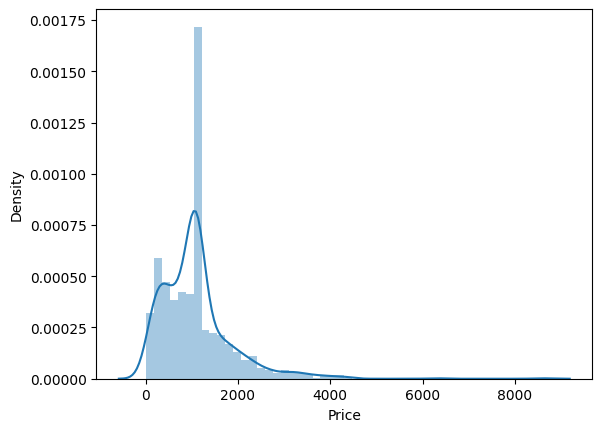

In [ ]:
sns.distplot(df_small['Price'])

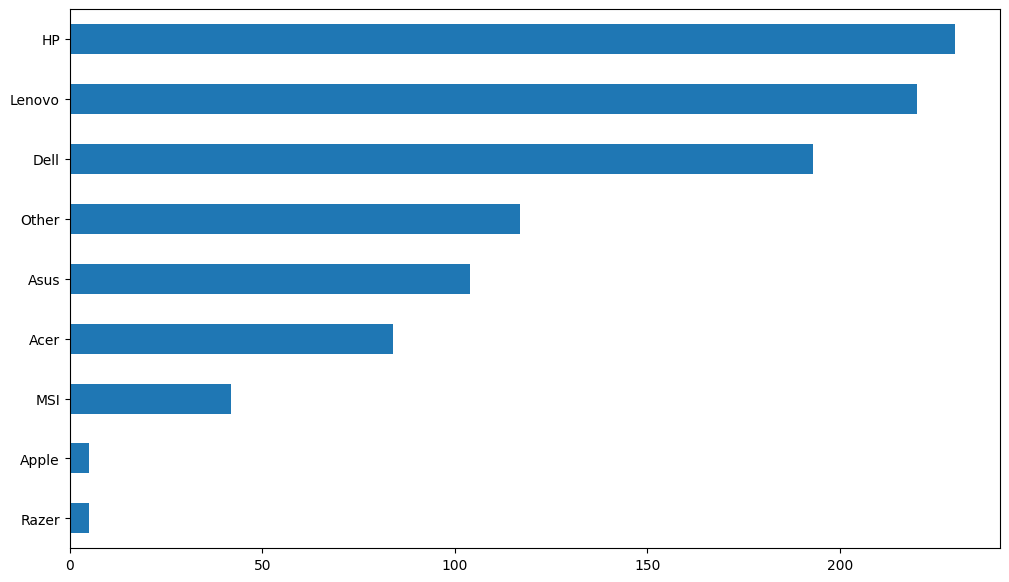

In [ ]:
plt.figure(figsize=[12,7])
rs = df_small['Company'].value_counts(ascending=True)
rs.plot(kind='barh')
plt.show()

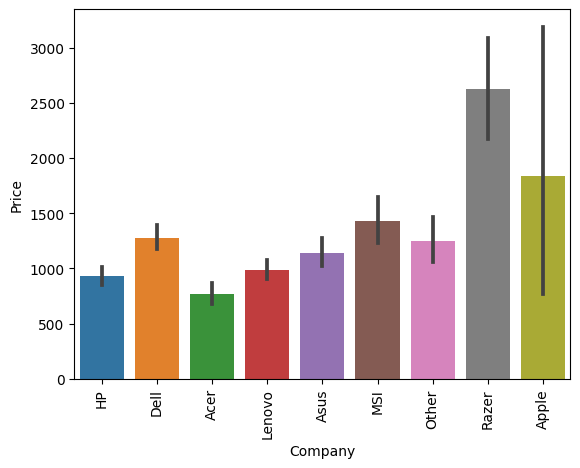

In [ ]:
sns.barplot(x=df_small['Company'],y=df_small['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\VIET TAY\AppData\Local\Temp\ipykernel_22892\529864925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_small['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

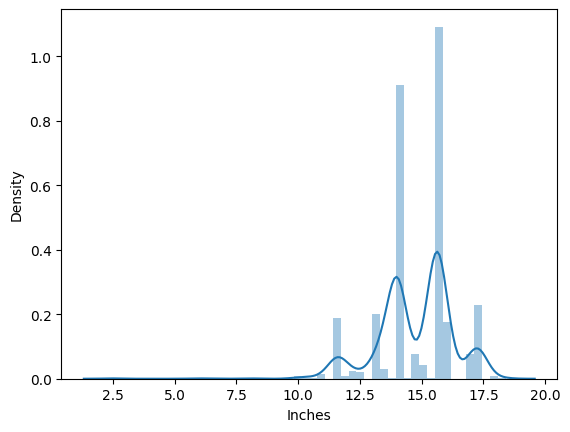

In [ ]:
sns.distplot(df_small['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

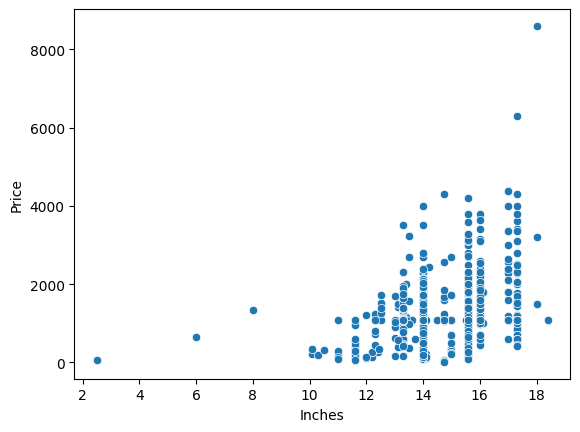

In [ ]:
sns.scatterplot(x=df_small['Inches'],y=df_small['Price'])

<Axes: >

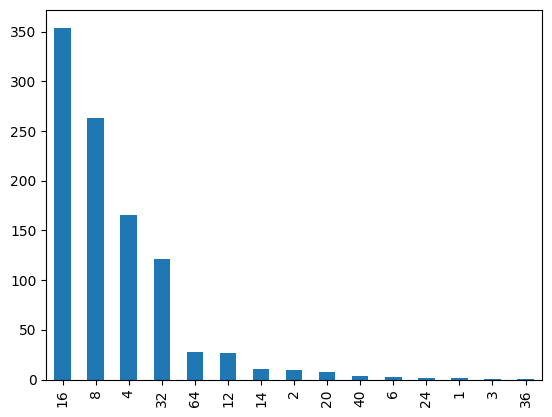

In [ ]:
df_small['RAM'].value_counts().plot(kind='bar')

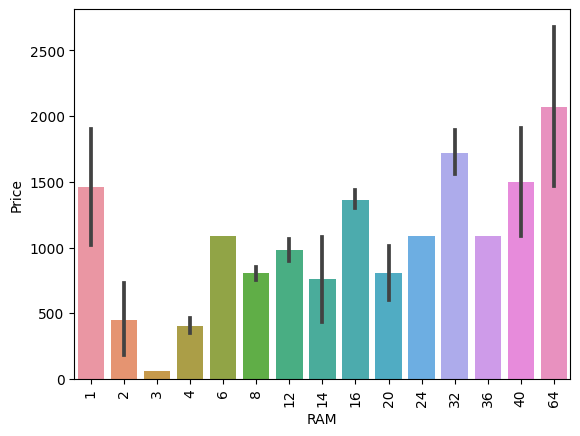

In [ ]:
sns.barplot(x=df_small['RAM'],y=df_small['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

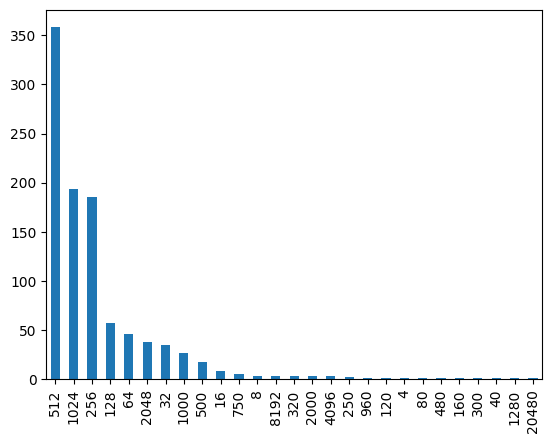

In [ ]:
df_small['Memory'].value_counts().plot(kind='bar')

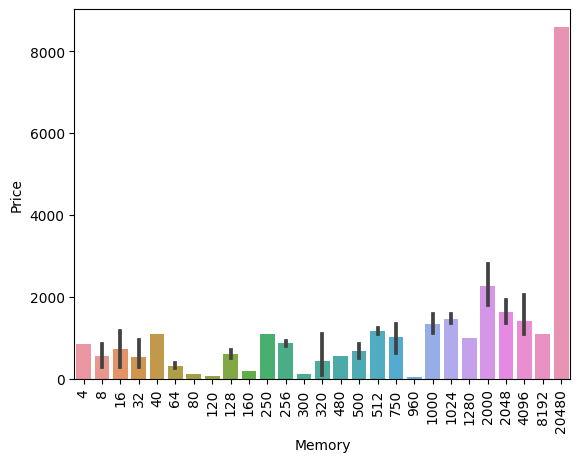

In [ ]:
sns.barplot(x=df_small['Memory'],y=df_small['Price'])
plt.xticks(rotation='vertical')
plt.show()

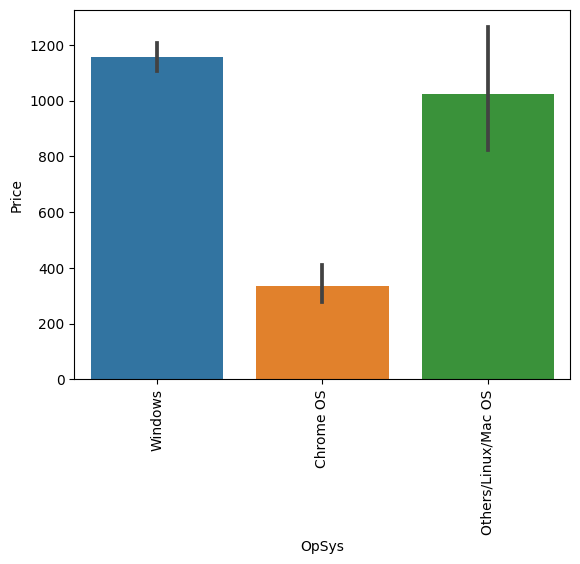

In [ ]:
sns.barplot(x=df_small['OpSys'],y=df_small['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\VIET TAY\AppData\Local\Temp\ipykernel_22892\1415979451.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_small['Weights'])


<Axes: xlabel='Weights', ylabel='Density'>

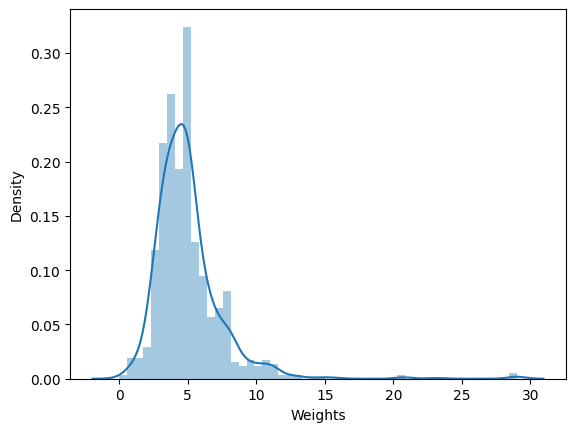

In [ ]:
sns.distplot(df_small['Weights'])

<Axes: xlabel='Weights', ylabel='Price'>

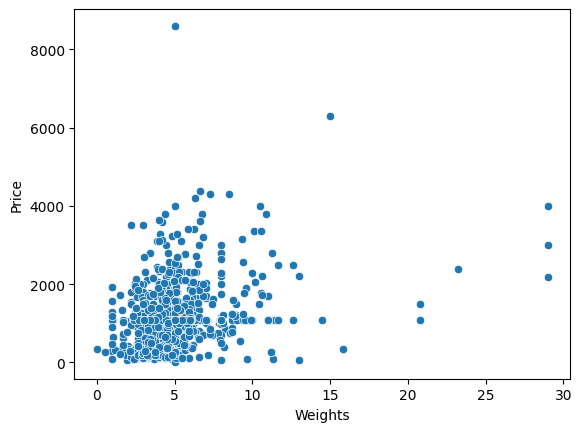

In [ ]:
sns.scatterplot(x=df_small['Weights'],y=df_small['Price'])

<Axes: >

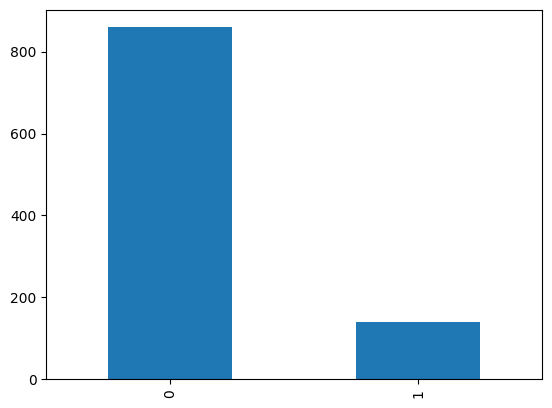

In [ ]:
df_small['Gaming'].value_counts().plot(kind='bar')

<Axes: xlabel='Gaming', ylabel='Price'>

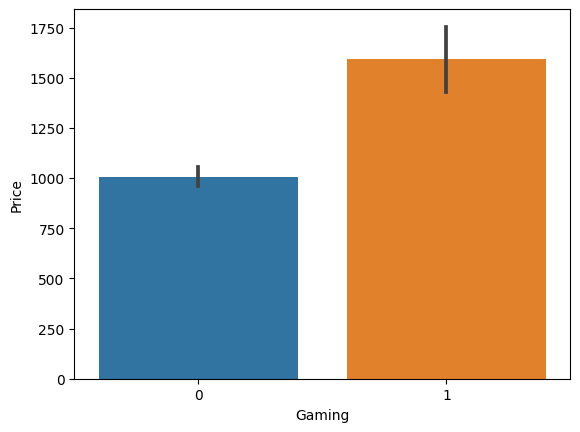

In [ ]:
sns.barplot(x=df_small['Gaming'],y=df_small['Price'])

<Axes: >

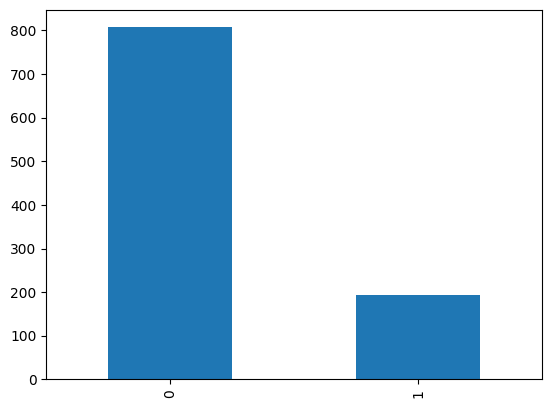

In [ ]:
df_small['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

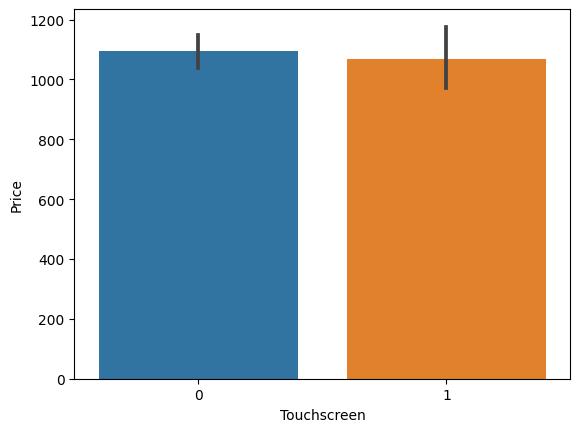

In [ ]:
sns.barplot(x=df_small['Touchscreen'],y=df_small['Price'])

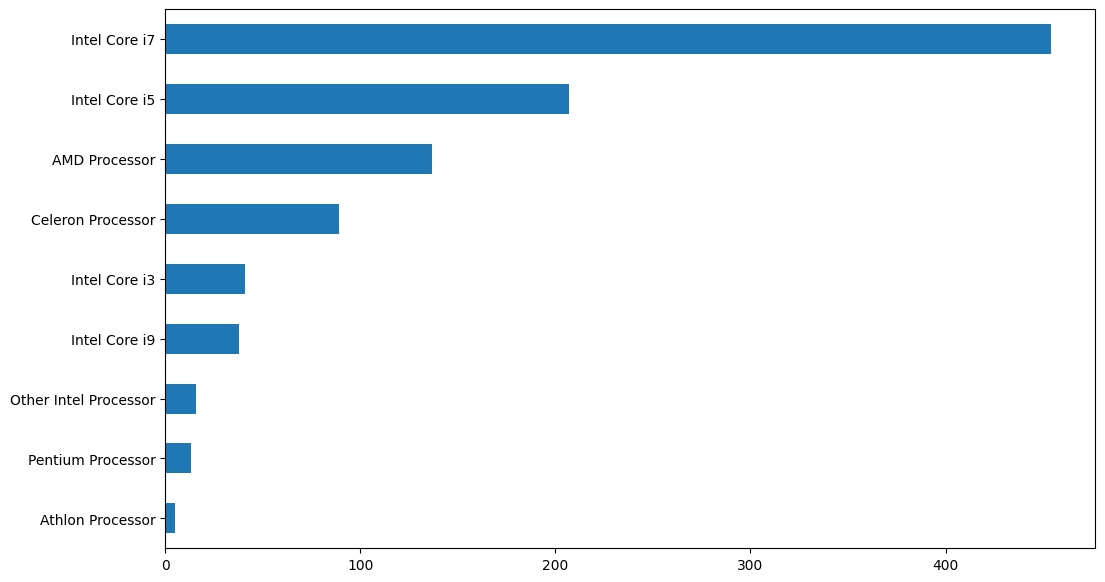

In [ ]:
plt.figure(figsize=[12,7])
rs = df_small['Cpu Brand'].value_counts(ascending=True)
rs.plot(kind='barh')
plt.show()

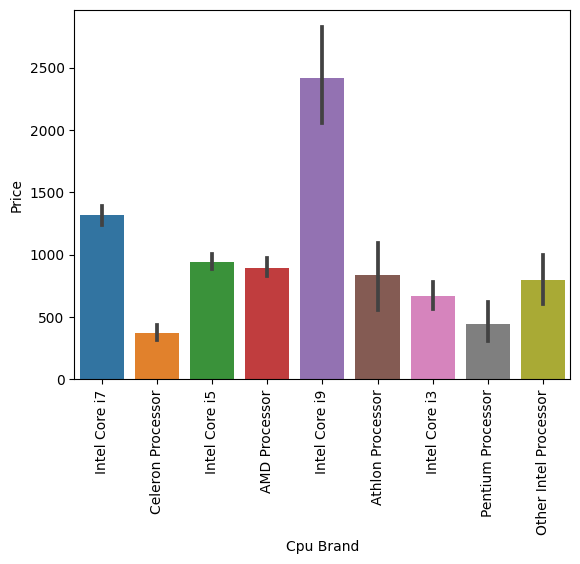

In [ ]:
sns.barplot(x=df_small['Cpu Brand'],y=df_small['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df_big = pd.read_csv('./raw data/10000_data.csv')
df_big = clean_all_data_big(df_big)

In [71]:
df_small = pd.read_csv('./raw data/1000_sampled_data.csv')
df_small = clean_all_data_small(df_small)
df_small['Price'] = Impute_missing_value(df_small['Price'],'mean')

In [72]:
from sklearn.model_selection import train_test_split
X_small = df_small.drop(columns=['Price'])
y_small = np.log(df_small['Price'])
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_small,y_small,test_size=0.3, random_state = 2)
X_test_s, X_val_s, y_test_s, y_val_s = train_test_split(X_test_s, y_test_s, test_size=0.5, random_state=2)

In [73]:
X_big = df_big.drop(columns=['Price'])
y_big = np.log(df_big['Price'])
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_big,y_big,test_size=0.3,random_state=2)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=2)

In [74]:
X_big.sample(100)

,Company,Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,OpSys,Weights
1495,Asus,ASUS VivoBook 13 Slate OLED Steven Harrington ...,13.3,1920x1080,Pentium,8,256.0,Intel UHD Graphics,Windows,1.72
5504,Asus,"ASUS Chromebook C424, 14.0"" 180 Degree FHD Nan...",14.0,1920x1080,Celeron N4020,4,128.0,Intel UHD Graphics 600,Chrome OS,5.16
4507,Dell,"Dell Latitude 7000 7320 13.3"" Notebook - Full ...",13.3,1920 x 1080,Core i5 Family,16,256.0,Intel Iris Xe Graphics,Windows,2.50
8630,Asus,ASUS VivoBook 15.6'' FHD Touch-Screen Thin&Lig...,15.6,1920x1080,Intel Core i5,12,512.0,Intel UHD Graphics 620,Windows,3.00
536,Lenovo,"Lenovo IdeaPad 3 15.6"" HD High Performance Lap...",15.6,1366x768,Core i5,8,256.0,Intel UHD Graphics,Windows,3.96
...,...,...,...,...,...,...,...,...,...,...
4579,Acer,Acer Predator Triton 500 SE Gaming/Creator Lap...,16.0,2560 x 1600,Core i9,32,1024.0,NaN,Windows,5.29
8220,HP,"EliteBook 820 G1 12.5"" LED Notebook - Intel Co...",12.5,NaN,Core i5,8,180.0,Intel HD Graphics 4400,Windows,5.20
10271,Acer,Acer Chromebook 511 (C741L) Chromebook Qualcom...,11.6,1366 x 768,Qualcomm Kryo 468,4,NaN,Adreno 618,Chrome OS,2.87
7607,Lenovo,Lenovo Thinkpad X240 Ultrabook 20AMA2H9US ( 12...,12.5,1366 x 768,Core i7,8,500.0,Intel HD Graphics,Windows,5.50


In [76]:
X_big = create_new_feature_1(X_big)
X_small = create_new_feature_1(X_small)

In [77]:
X_big['X_res'] = Impute_missing_value(X_big['X_res'], 'mean')
X_big['Y_res'] = Impute_missing_value(X_big['Y_res'], 'mean')
X_big['Memory'] = Impute_missing_value(X_big['Memory'], 'mean')
X_big['Inches'] = Impute_missing_value(X_big['Inches'], 'mean')
X_big['RAM'] = Impute_missing_value(X_big['RAM'], 'mean')
X_big['Weights'] = Impute_missing_value(X_big['Weights'], 'mean')
X_big['Cpu Brand'] = Impute_missing_value(X_big['Cpu Brand'], 'mode')
X_big['Gpu brand'] = Impute_missing_value(X_big['Gpu brand'], 'mode')
X_big['OpSys'] = Impute_missing_value(X_big['OpSys'], 'mode')

In [78]:
X_small['X_res'] = Impute_missing_value(X_small['X_res'], 'mean')
X_small['Y_res'] = Impute_missing_value(X_small['Y_res'], 'mean')
X_small['Memory'] = Impute_missing_value(X_small['Memory'], 'mean')
X_small['Inches'] = Impute_missing_value(X_small['Inches'], 'mean')
X_small['RAM'] = Impute_missing_value(X_small['RAM'], 'mean')
X_small['Weights'] = Impute_missing_value(X_small['Weights'], 'mean')
X_small['Cpu Brand'] = Impute_missing_value(X_small['Cpu Brand'], 'mode')
X_small['Gpu brand'] = Impute_missing_value(X_small['Gpu brand'], 'mode')
X_small['OpSys'] = Impute_missing_value(X_small['OpSys'], 'mode')

In [86]:
X_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1000 non-null   int32  
 1   Inches       1000 non-null   float64
 2   RAM          1000 non-null   int32  
 3   Memory       1000 non-null   float64
 4   OpSys        1000 non-null   int32  
 5   Weights      1000 non-null   float64
 6   X_res        1000 non-null   float64
 7   Y_res        1000 non-null   float64
 8   Cpu Brand    1000 non-null   int32  
 9   Gpu brand    1000 non-null   int32  
 10  Gaming       1000 non-null   int32  
 11  Touchscreen  1000 non-null   int32  
 12  ppi          1000 non-null   float64
dtypes: float64(6), int32(7)
memory usage: 74.3 KB


In [80]:
X_small = create_feature_ppi(X_small)
X_big = create_feature_ppi(X_big)

In [85]:
X_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10305 non-null  int32  
 1   Inches       10305 non-null  float64
 2   RAM          10305 non-null  int32  
 3   Memory       10305 non-null  float64
 4   OpSys        10305 non-null  int32  
 5   Weights      10305 non-null  float64
 6   X_res        10305 non-null  float64
 7   Y_res        10305 non-null  float64
 8   Cpu Brand    10305 non-null  int32  
 9   Gpu brand    10305 non-null  int32  
 10  Gaming       10305 non-null  int32  
 11  Touchscreen  10305 non-null  int32  
 12  ppi          10305 non-null  float64
dtypes: float64(6), int32(7)
memory usage: 764.9 KB


In [83]:
le = LabelEncoder()
X_big['Company'] = le.fit_transform(X_big['Company'])
X_big['OpSys'] = le.fit_transform(X_big['OpSys'])
X_big['Cpu Brand'] = le.fit_transform(X_big['Cpu Brand'])
X_big['Gpu brand'] = le.fit_transform(X_big['Gpu brand'])

In [84]:
X_small['Company'] = le.fit_transform(X_small['Company'])
X_small['OpSys'] = le.fit_transform(X_small['OpSys'])
X_small['Cpu Brand'] = le.fit_transform(X_small['Cpu Brand'])
X_small['Gpu brand'] = le.fit_transform(X_small['Gpu brand'])

In [90]:
X_small.sample(10)

,Company,Inches,RAM,Memory,OpSys,Weights,X_res,Y_res,Cpu Brand,Gpu brand,Gaming,Touchscreen,ppi
477,5,15.6,12,512.0,2,3.870000,1920.000000,1080.000000,5,1,0,1,141.211998
576,5,11.6,4,64.0,0,2.600000,1366.000000,768.000000,5,1,0,1,135.094211
511,4,14.0,16,512.0,2,4.750000,1920.000000,1200.000000,5,1,0,1,161.725391
724,3,15.6,0,500.0,2,11.000000,1939.714451,1114.262967,5,1,0,0,143.396076
240,3,13.3,8,256.0,2,3.450000,1920.000000,1080.000000,3,1,0,1,165.632118
854,6,15.6,16,512.0,2,4.100000,1920.000000,1080.000000,5,2,1,0,141.211998
31,5,10.1,4,64.0,0,15.800000,1920.000000,1200.000000,5,1,0,0,224.173809
86,5,15.6,8,1024.0,2,4.840000,1920.000000,1080.000000,4,2,1,0,141.211998
39,0,15.6,16,2048.0,1,5.015483,1939.714451,1114.262967,5,1,0,0,143.396076
777,7,14.0,16,512.0,2,3.310000,1920.000000,1080.000000,5,1,0,0,157.350512


In [91]:
X_train_b = create_new_feature_1(X_train_b)
X_train_s = create_new_feature_1(X_train_s)
X_test_s = create_new_feature_1(X_test_s)
X_test_b = create_new_feature_1(X_test_b)
X_val_s = create_new_feature_1(X_val_s)
X_val_b = create_new_feature_1(X_val_b)

In [93]:
X_train_s['X_res'] = Impute_missing_value(X_train_s['X_res'], 'mean')
X_train_s['Y_res'] = Impute_missing_value(X_train_s['Y_res'], 'mean')
X_train_s['Memory'] = Impute_missing_value(X_train_s['Memory'], 'mean')
X_train_s['Inches'] = Impute_missing_value(X_train_s['Inches'], 'mean')
X_train_s['RAM'] = Impute_missing_value(X_train_s['RAM'], 'mean')
X_train_s['Weights'] = Impute_missing_value(X_train_s['Weights'], 'mean')
X_train_s['Cpu Brand'] = Impute_missing_value(X_train_s['Cpu Brand'], 'mode')
X_train_s['Gpu brand'] = Impute_missing_value(X_train_s['Gpu brand'], 'mode')
X_train_s['OpSys'] = Impute_missing_value(X_train_s['OpSys'], 'mode')

X_train_b['X_res'] = Impute_missing_value(X_train_b['X_res'], 'mean')
X_train_b['Y_res'] = Impute_missing_value(X_train_b['Y_res'], 'mean')
X_train_b['Memory'] = Impute_missing_value(X_train_b['Memory'], 'mean')
X_train_b['Inches'] = Impute_missing_value(X_train_b['Inches'], 'mean')
X_train_b['RAM'] = Impute_missing_value(X_train_b['RAM'], 'mean')
X_train_b['Weights'] = Impute_missing_value(X_train_b['Weights'], 'mean')
X_train_b['Cpu Brand'] = Impute_missing_value(X_train_b['Cpu Brand'], 'mode')
X_train_b['Gpu brand'] = Impute_missing_value(X_train_b['Gpu brand'], 'mode')
X_train_b['OpSys'] = Impute_missing_value(X_train_b['OpSys'], 'mode')


X_test_s['X_res'] = Impute_missing_value(X_test_s['X_res'], 'mean',X_train_s['X_res'])
X_test_s['Y_res'] = Impute_missing_value(X_test_s['Y_res'], 'mean',X_train_s['Y_res'])
X_test_s['Memory'] = Impute_missing_value(X_test_s['Memory'], 'mean',X_train_s['Memory'])
X_test_s['Inches'] = Impute_missing_value(X_test_s['Inches'], 'mean', X_train_s['Inches'])
X_test_s['RAM'] = Impute_missing_value(X_test_s['RAM'], 'mean',X_train_s['RAM'])
X_test_s['Weights'] = Impute_missing_value(X_test_s['Weights'], 'mean',X_train_s['Weights'])
X_test_s['Cpu Brand'] = Impute_missing_value(X_test_s['Cpu Brand'], 'mode',X_train_s['Cpu Brand'])
X_test_s['Gpu brand'] = Impute_missing_value(X_test_s['Gpu brand'], 'mode',X_train_s['Gpu brand'])
X_test_s['OpSys'] = Impute_missing_value(X_test_s['OpSys'], 'mode',X_train_s['OpSys'])

X_test_b['X_res'] = Impute_missing_value(X_test_b['X_res'], 'mean',X_train_b['X_res'])
X_test_b['Y_res'] = Impute_missing_value(X_test_b['Y_res'], 'mean',X_train_b['Y_res'])
X_test_b['Memory'] = Impute_missing_value(X_test_b['Memory'], 'mean',X_train_b['Memory'])
X_test_b['Inches'] = Impute_missing_value(X_test_b['Inches'], 'mean', X_train_b['Inches'])
X_test_b['RAM'] = Impute_missing_value(X_test_b['RAM'], 'mean',X_train_b['RAM'])
X_test_b['Weights'] = Impute_missing_value(X_test_b['Weights'], 'mean',X_train_b['Weights'])
X_test_b['Cpu Brand'] = Impute_missing_value(X_test_b['Cpu Brand'], 'mode',X_train_b['Cpu Brand'])
X_test_b['Gpu brand'] = Impute_missing_value(X_test_b['Gpu brand'], 'mode',X_train_b['Gpu brand'])
X_test_b['OpSys'] = Impute_missing_value(X_test_b['OpSys'], 'mode',X_train_b['OpSys'])


X_val_s['X_res'] = Impute_missing_value(X_val_s['X_res'], 'mean',X_train_s['X_res'])
X_val_s['Y_res'] = Impute_missing_value(X_val_s['Y_res'], 'mean',X_train_s['Y_res'])
X_val_s['Memory'] = Impute_missing_value(X_val_s['Memory'], 'mean',X_train_s['Memory'])
X_val_s['Inches'] = Impute_missing_value(X_val_s['Inches'], 'mean', X_train_s['Inches'])
X_val_s['RAM'] = Impute_missing_value(X_val_s['RAM'], 'mean',X_train_s['RAM'])
X_val_s['Weights'] = Impute_missing_value(X_val_s['Weights'], 'mean',X_train_s['Weights'])
X_val_s['Cpu Brand'] = Impute_missing_value(X_val_s['Cpu Brand'], 'mode',X_train_s['Cpu Brand'])
X_val_s['Gpu brand'] = Impute_missing_value(X_val_s['Gpu brand'], 'mode',X_train_s['Gpu brand'])
X_val_s['OpSys'] = Impute_missing_value(X_val_s['OpSys'], 'mode',X_train_s['OpSys'])

X_val_b['X_res'] = Impute_missing_value(X_val_b['X_res'], 'mean',X_train_b['X_res'])
X_val_b['Y_res'] = Impute_missing_value(X_val_b['Y_res'], 'mean',X_train_b['Y_res'])
X_val_b['Memory'] = Impute_missing_value(X_val_b['Memory'], 'mean',X_train_b['Memory'])
X_val_b['Inches'] = Impute_missing_value(X_val_b['Inches'], 'mean', X_train_b['Inches'])
X_val_b['RAM'] = Impute_missing_value(X_val_b['RAM'], 'mean',X_train_b['RAM'])
X_val_b['Weights'] = Impute_missing_value(X_val_b['Weights'], 'mean',X_train_b['Weights'])
X_val_b['Cpu Brand'] = Impute_missing_value(X_val_b['Cpu Brand'], 'mode',X_train_b['Cpu Brand'])
X_val_b['Gpu brand'] = Impute_missing_value(X_val_b['Gpu brand'], 'mode',X_train_b['Gpu brand'])
X_val_b['OpSys'] = Impute_missing_value(X_val_b['OpSys'], 'mode',X_train_b['OpSys'])

In [104]:
X_train_s = create_feature_ppi(X_train_s)
X_train_b = create_feature_ppi(X_train_b)
X_test_s = create_feature_ppi(X_test_s)
X_test_b = create_feature_ppi(X_test_b)
X_val_s = create_feature_ppi(X_val_s)
X_val_b = create_feature_ppi(X_val_b)

In [111]:
X_train_s['Company'] = le.fit_transform(X_train_s['Company'])
X_train_s['OpSys'] = le.fit_transform(X_train_s['OpSys'])
X_train_s['Cpu Brand'] = le.fit_transform(X_train_s['Cpu Brand'])
X_train_s['Gpu brand'] = le.fit_transform(X_train_s['Gpu brand'])

X_train_b['Company'] = le.fit_transform(X_train_b['Company'])
X_train_b['OpSys'] = le.fit_transform(X_train_b['OpSys'])
X_train_b['Cpu Brand'] = le.fit_transform(X_train_b['Cpu Brand'])
X_train_b['Gpu brand'] = le.fit_transform(X_train_b['Gpu brand'])

X_test_s['Company'] = le.fit_transform(X_test_s['Company'])
X_test_s['OpSys'] = le.fit_transform(X_test_s['OpSys'])
X_test_s['Cpu Brand'] = le.fit_transform(X_test_s['Cpu Brand'])
X_test_s['Gpu brand'] = le.fit_transform(X_test_s['Gpu brand'])

X_test_b['Company'] = le.fit_transform(X_test_b['Company'])
X_test_b['OpSys'] = le.fit_transform(X_test_b['OpSys'])
X_test_b['Cpu Brand'] = le.fit_transform(X_test_b['Cpu Brand'])
X_test_b['Gpu brand'] = le.fit_transform(X_test_b['Gpu brand'])

X_val_s['Company'] = le.fit_transform(X_val_s['Company'])
X_val_s['OpSys'] = le.fit_transform(X_val_s['OpSys'])
X_val_s['Cpu Brand'] = le.fit_transform(X_val_s['Cpu Brand'])
X_val_s['Gpu brand'] = le.fit_transform(X_val_s['Gpu brand'])

X_val_b['Company'] = le.fit_transform(X_val_b['Company'])
X_val_b['OpSys'] = le.fit_transform(X_val_b['OpSys'])
X_val_b['Cpu Brand'] = le.fit_transform(X_val_b['Cpu Brand'])
X_val_b['Gpu brand'] = le.fit_transform(X_val_b['Gpu brand'])

In [113]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7213 entries, 7680 to 7336
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      7213 non-null   int32  
 1   Inches       7213 non-null   float64
 2   RAM          7213 non-null   int32  
 3   Memory       7213 non-null   float64
 4   OpSys        7213 non-null   int32  
 5   Weights      7213 non-null   float64
 6   X_res        7213 non-null   float64
 7   Y_res        7213 non-null   float64
 8   Cpu Brand    7213 non-null   int32  
 9   Gpu brand    7213 non-null   int32  
 10  Gaming       7213 non-null   int32  
 11  Touchscreen  7213 non-null   int32  
 12  ppi          7213 non-null   float64
dtypes: float64(6), int32(7)
memory usage: 591.7 KB


#### Lựa chọn đặc trưng quan trọng

Thử với thuật toán RandomForest trên tập small

In [125]:
rf = RandomForestRegressor(random_state=3)

rf.fit(X_train_s, y_train_s)

feature_importances1 = pd.DataFrame(rf.feature_importances_, index=X_train_s.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances1)

top_features1 = feature_importances1.index[:6].tolist()
print(top_features1)

             importance
RAM            0.466706
Weights        0.133665
Memory         0.081556
Cpu Brand      0.054240
Company        0.049817
ppi            0.049648
Inches         0.040110
Y_res          0.037997
X_res          0.032912
Gpu brand      0.019614
OpSys          0.017615
Touchscreen    0.013384
Gaming         0.002737
['RAM', 'Weights', 'Memory', 'Cpu Brand', 'Company', 'ppi']


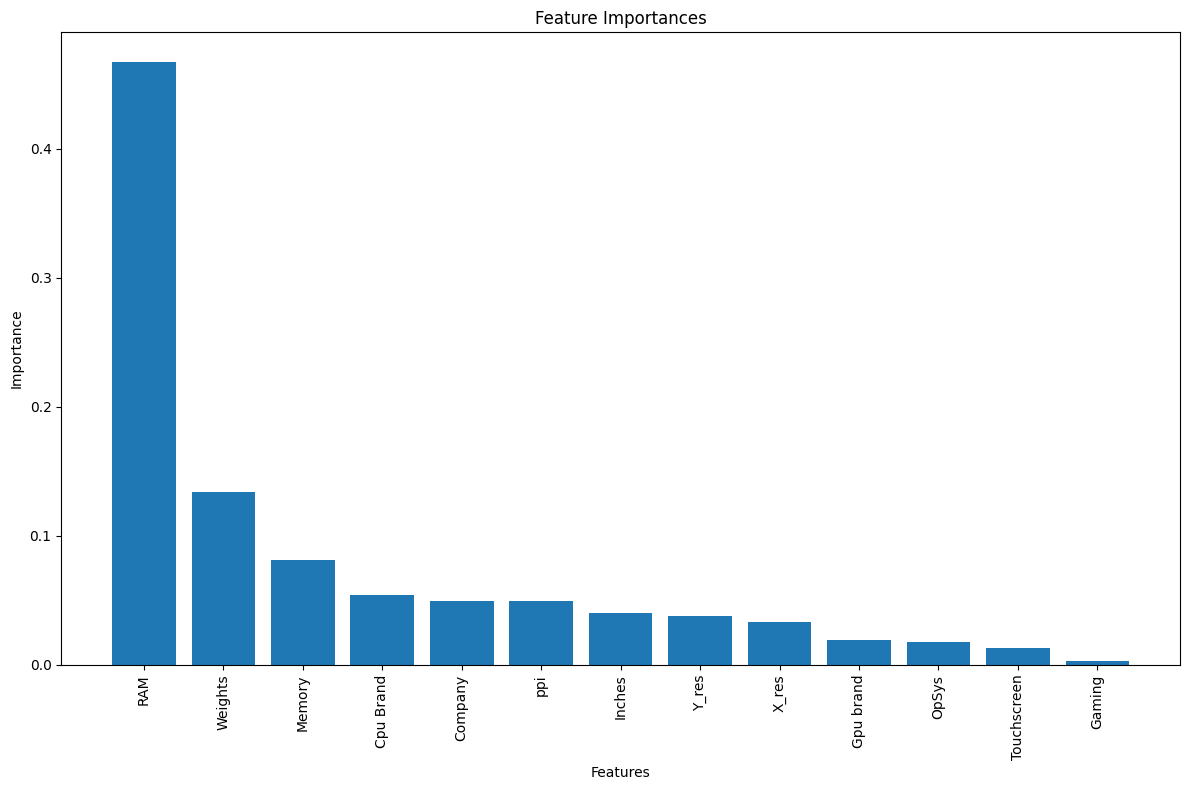

In [126]:
plt.figure(figsize=(12, 8))
plt.bar(feature_importances1.index, feature_importances1['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Thử với thuật toán RandomForest trên tập big

In [127]:

rf = RandomForestRegressor(random_state=3)

rf.fit(X_train_b, y_train_b)

feature_importances2 = pd.DataFrame(rf.feature_importances_, index=X_train_b.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances2)

top_features2 = feature_importances2.index[:6].tolist()
print(top_features2)

             importance
RAM            0.342257
Memory         0.185370
Weights        0.127003
Cpu Brand      0.079163
Y_res          0.060183
Company        0.050508
ppi            0.039087
Inches         0.033225
Gpu brand      0.026922
X_res          0.023556
Touchscreen    0.014269
OpSys          0.013239
Gaming         0.005218
['RAM', 'Memory', 'Weights', 'Cpu Brand', 'Y_res', 'Company']


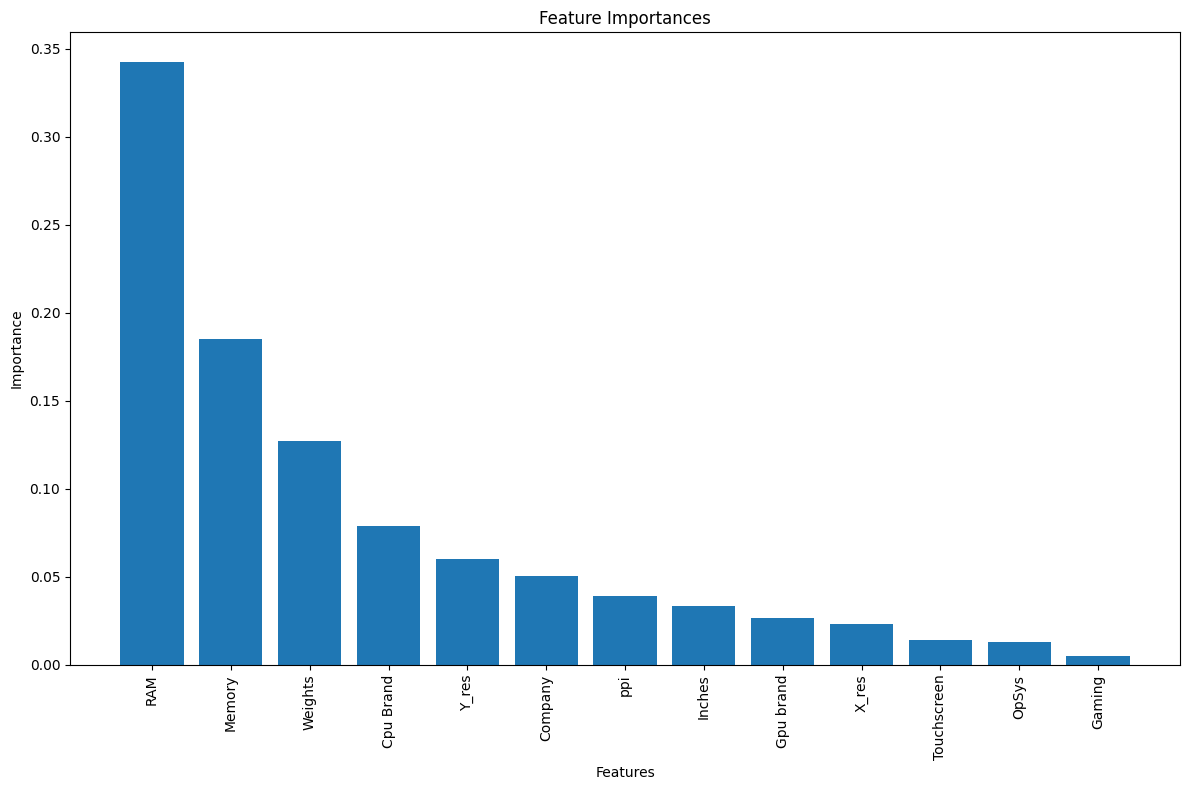

In [128]:
plt.figure(figsize=(12, 8))
plt.bar(feature_importances2.index, feature_importances2['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Thử với thuật toán GradientBoosting trên tập small

In [133]:
rf = GradientBoostingRegressor(random_state=3)

rf.fit(X_train_s, y_train_s)

feature_importances3 = pd.DataFrame(rf.feature_importances_, index=X_train_s.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances3)

top_features3 = feature_importances3.index[:6].tolist()
print(top_features3)

             importance
RAM            0.564846
Weights        0.087559
Memory         0.082630
X_res          0.049185
Y_res          0.037034
Cpu Brand      0.036897
ppi            0.036850
Inches         0.033076
Gpu brand      0.031042
Company        0.016044
OpSys          0.015743
Touchscreen    0.008925
Gaming         0.000169
['RAM', 'Weights', 'Memory', 'X_res', 'Y_res', 'Cpu Brand']


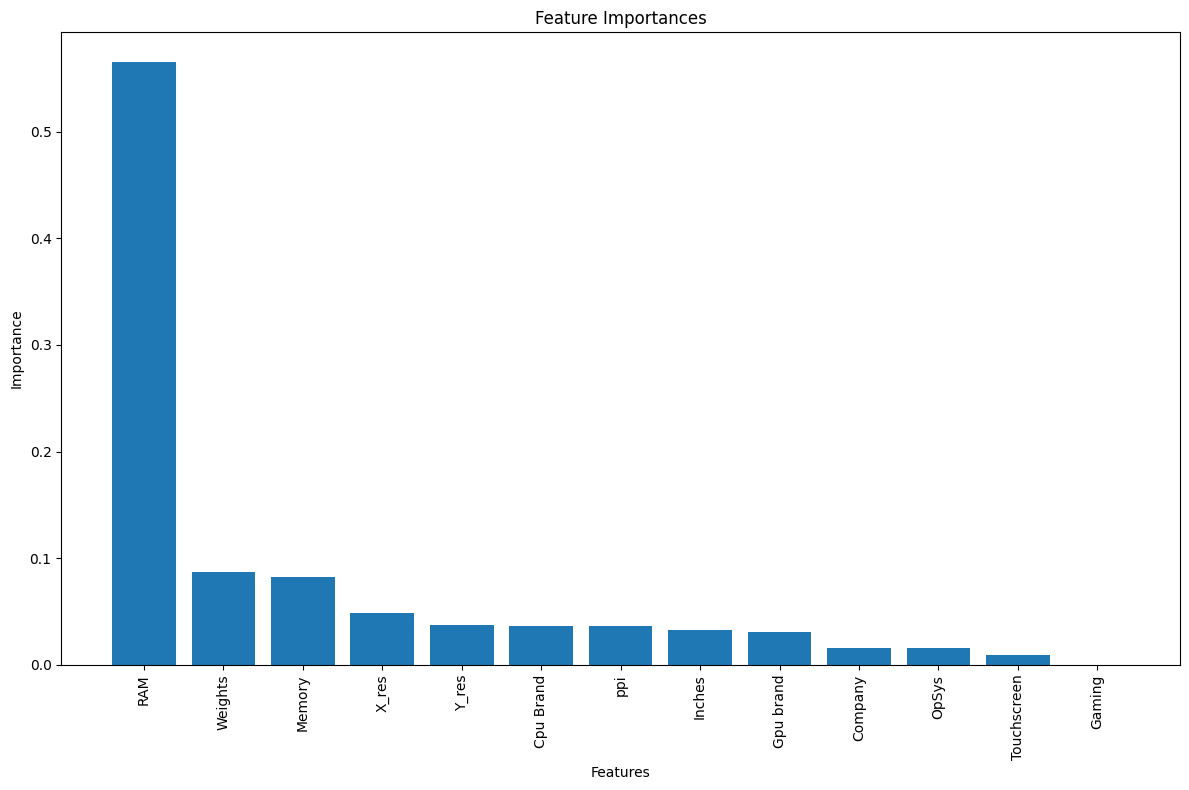

In [134]:
plt.figure(figsize=(12, 8))
plt.bar(feature_importances3.index, feature_importances3['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Thử với thuật toán GradientBoosting trên tập big

In [136]:
rf = GradientBoostingRegressor(random_state=3)

rf.fit(X_train_b, y_train_b)

feature_importances4 = pd.DataFrame(rf.feature_importances_, index=X_train_b.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances4)

top_features4 = feature_importances4.index[:6].tolist()
print(top_features4)

             importance
RAM            0.482878
Memory         0.188289
Y_res          0.086822
Cpu Brand      0.071655
Gpu brand      0.040957
Weights        0.037055
X_res          0.028458
Inches         0.022988
OpSys          0.015502
Company        0.010410
ppi            0.008877
Touchscreen    0.005733
Gaming         0.000377
['RAM', 'Memory', 'Y_res', 'Cpu Brand', 'Gpu brand', 'Weights']


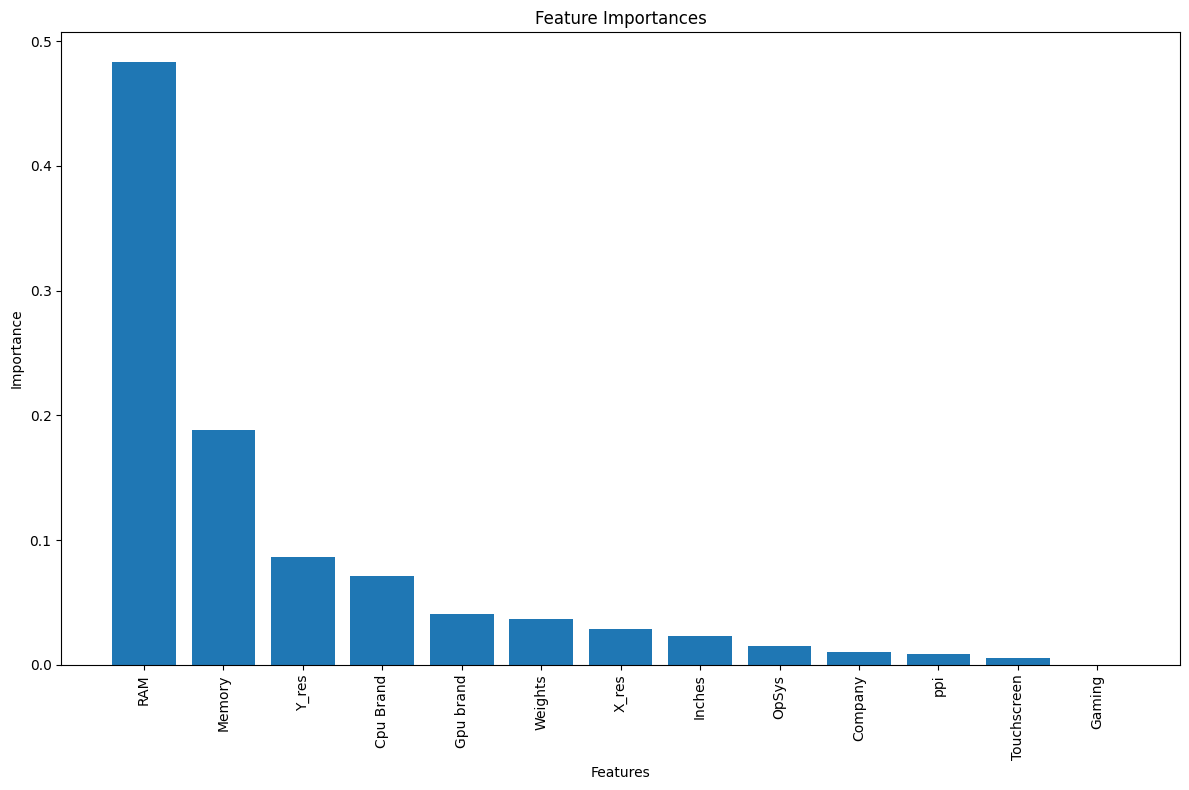

In [137]:
plt.figure(figsize=(12, 8))
plt.bar(feature_importances4.index, feature_importances4['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Thử dự đoán tập test dùng kĩ thuật lựa chọn đặc trưng

In [185]:
Selecting_rs = pd.DataFrame(columns=['Case','Big data', 'Small data'])

model = RandomForestRegressor(random_state=3)

result_small = cross_validate(model, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(model, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Case': 'Randomforest before selecting feature','Big data':average_r2_b, 'Small data': average_r2_s}
Selecting_rs = pd.concat([Selecting_rs, pd.DataFrame([row])], ignore_index=True)

In [186]:
model = RandomForestRegressor(random_state=3)
X_big_temp = X_big[['RAM', 'Memory', 'Weights', 'Cpu Brand', 'Y_res', 'Company']]
X_small_temp = X_small[['RAM', 'Weights', 'Memory', 'Cpu Brand', 'Company', 'ppi']]
result_small = cross_validate(model, X_small_temp, y_small, cv=5, scoring='r2')
result_big = cross_validate(model, X_big_temp, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Case': 'Randomforest after selecting feature','Big data':average_r2_b, 'Small data': average_r2_s}
Selecting_rs = pd.concat([Selecting_rs, pd.DataFrame([row])], ignore_index=True)

In [187]:
model = GradientBoostingRegressor(random_state=3)

result_small = cross_validate(model, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(model, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Case': 'Randomforest before selecting feature','Big data':average_r2_b, 'Small data': average_r2_s}
Selecting_rs = pd.concat([Selecting_rs, pd.DataFrame([row])], ignore_index=True)

In [188]:
model = GradientBoostingRegressor(random_state=3)
X_big_temp = X_big[['RAM', 'Memory', 'Y_res', 'Cpu Brand', 'Gpu brand', 'Weights']]
X_small_temp = X_small[['RAM', 'Weights', 'Memory', 'X_res', 'Y_res', 'Cpu Brand']]
result_small = cross_validate(model, X_small_temp, y_small, cv=5, scoring='r2')
result_big = cross_validate(model, X_big_temp, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Case': 'Randomforest after selecting feature','Big data':average_r2_b, 'Small data': average_r2_s}
Selecting_rs = pd.concat([Selecting_rs, pd.DataFrame([row])], ignore_index=True)

In [189]:
Selecting_rs

,Case,Big data,Small data
0,Randomforest before selecting feature,0.582773,0.485841
1,Randomforest after selecting feature,0.542303,0.474110
2,Randomforest before selecting feature,0.556681,0.507433
3,Randomforest after selecting feature,0.556736,0.468746


In [143]:
result = pd.DataFrame(columns=['Case','R2 score', 'MSE', 'MAE'])
X_train_temp = X_train_b.copy()
rf = RandomForestRegressor(random_state=3)
rf.fit(X_train_temp, y_train_b)
y_pred_test_b = rf.predict(X_test_b)

row = {'Case': 'RandomForest before selecting feature', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)


In [144]:

X_train_temp = X_train_b[['RAM', 'Memory', 'Weights', 'Cpu Brand', 'Y_res', 'Company']]
rf = RandomForestRegressor(random_state=3)
X_test_temp = X_test_b[['RAM', 'Memory', 'Weights', 'Cpu Brand', 'Y_res', 'Company']]
rf.fit(X_train_temp, y_train_b)
y_pred_test_b = rf.predict(X_test_temp)

row = {'Case': 'RandomForest after selecting feature', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [146]:
X_train_temp = X_train_b.copy()
rf = GradientBoostingRegressor(random_state=3)
rf.fit(X_train_temp, y_train_b)
y_pred_test_b = rf.predict(X_test_b)

row = {'Case': 'GradientBoostingRegressor before selecting feature', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [147]:
X_train_temp = X_train_b[['RAM', 'Memory', 'Y_res', 'Cpu Brand', 'Gpu brand', 'Weights']]
rf = GradientBoostingRegressor(random_state=3)
X_test_temp = X_test_b[['RAM', 'Memory', 'Y_res', 'Cpu Brand', 'Gpu brand', 'Weights']]
rf.fit(X_train_temp, y_train_b)
y_pred_test_b = rf.predict(X_test_temp)

row = {'Case': 'GradientBoostingRegressor after selecting feature', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [148]:
result

,Case,R2 score,MSE,MAE
0,RandomForest before selecting feature,0.780562,0.118020,0.199335
1,RandomForest after selecting feature,0.752468,0.133130,0.221614
2,GradientBoostingRegressor before selecting fea...,0.676043,0.174234,0.308205
3,GradientBoostingRegressor after selecting feature,0.664163,0.180623,0.315835


#### Thử nghiệm kĩ thuật chuẩn hóa

Thử trên thuật toán RandomForest

In [153]:
X_big.sample()

,Company,Inches,RAM,Memory,OpSys,Weights,X_res,Y_res,Cpu Brand,Gpu brand,Gaming,Touchscreen,ppi
6657,7,15.6,8,256.0,2,3.4,1920.0,1080.0,2,1,0,0,141.211998


In [161]:
Scaling_rs = pd.DataFrame(columns=['Scaling method','Big data', 'Small data'])
scaler = StandardScaler()
model = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'StandardScaler','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs = pd.concat([Scaling_rs, pd.DataFrame([row])], ignore_index=True)

In [162]:
scaler = MinMaxScaler()
model = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'MinMaxScaler','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs = pd.concat([Scaling_rs, pd.DataFrame([row])], ignore_index=True)

In [163]:
scaler =  Normalizer()
model = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'Normalizer','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs = pd.concat([Scaling_rs, pd.DataFrame([row])], ignore_index=True)

In [164]:
scaler = PowerTransformer()
model = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'PowerTransformer','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs = pd.concat([Scaling_rs, pd.DataFrame([row])], ignore_index=True)

In [165]:
Scaling_rs

,Scaling method,Big data,Small data
0,StandardScaler,0.582945,0.487346
1,MinMaxScaler,0.582881,0.485908
2,Normalizer,0.576598,0.481420
3,PowerTransformer,0.582467,0.487764


Thử dự đoán trên tập test với randomforest

In [171]:
result = pd.DataFrame(columns=['Case','R2 score', 'MSE', 'MAE'])
X_train_temp = X_train_b.copy()
rf = RandomForestRegressor(random_state=3)

rf.fit(X_train_temp, y_train_b)
y_pred_test_b = rf.predict(X_test_b)

row = {'Case': 'Bigdata before scaling', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [172]:
X_train_temp = X_train_b.copy()
scaler = StandardScaler()
model = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_temp, y_train_b)
y_pred_test_b = pipe.predict(X_test_b)

row = {'Case': 'Bigdata after scaling', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [173]:

X_train_temp = X_train_s.copy()
rf = RandomForestRegressor(random_state=3)

rf.fit(X_train_temp, y_train_s)
y_pred_test_s = rf.predict(X_test_s)

row = {'Case': 'Smalldata before scaling', 'R2 score': r2_score(y_test_s,y_pred_test_s),'MSE': mean_squared_error(y_test_s, y_pred_test_s), 'MAE': mean_absolute_error(y_test_s,y_pred_test_s) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [175]:
X_train_temp = X_train_s.copy()
scaler = StandardScaler()
model = RandomForestRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_temp, y_train_s)
y_pred_test_s = pipe.predict(X_test_s)

row = {'Case': 'Bigdata after scaling', 'R2 score': r2_score(y_test_s,y_pred_test_s),'MSE': mean_squared_error(y_test_s, y_pred_test_s), 'MAE': mean_absolute_error(y_test_s,y_pred_test_s) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [176]:
result

,Case,R2 score,MSE,MAE
0,Bigdata before scaling,0.780562,0.118020,0.199335
1,Bigdata after scaling,0.780554,0.118025,0.199258
2,Smalldata before scaling,0.483615,0.353446,0.386837
3,Bigdata after scaling,0.484466,0.352864,0.387017


Thử trên thuật toán GradientBoosting

In [166]:
Scaling_rs2 = pd.DataFrame(columns=['Scaling method','Big data', 'Small data'])
scaler = StandardScaler()

model = GradientBoostingRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'StandardScaler','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs2 = pd.concat([Scaling_rs2, pd.DataFrame([row])], ignore_index=True)

In [167]:

scaler = MinMaxScaler()

model = GradientBoostingRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'MinMaxScaler','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs2 = pd.concat([Scaling_rs2, pd.DataFrame([row])], ignore_index=True)

In [168]:
scaler = Normalizer()

model = GradientBoostingRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'Normalizer','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs2 = pd.concat([Scaling_rs2, pd.DataFrame([row])], ignore_index=True)

In [169]:
scaler = PowerTransformer()

model = GradientBoostingRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

result_small = cross_validate(pipe, X_small, y_small, cv=5, scoring='r2')
result_big = cross_validate(pipe, X_big, y_big, cv=5, scoring='r2')

average_r2_s = np.mean(result_small['test_score'])
average_r2_b = np.mean(result_big['test_score'])
row = {'Scaling method': 'PowerTransformer','Big data':average_r2_b, 'Small data': average_r2_s}
Scaling_rs2 = pd.concat([Scaling_rs2, pd.DataFrame([row])], ignore_index=True)

In [170]:
Scaling_rs2

,Scaling method,Big data,Small data
0,StandardScaler,0.556708,0.507739
1,MinMaxScaler,0.556672,0.507367
2,Normalizer,0.548778,0.497880
3,PowerTransformer,0.556556,0.509044


In [177]:
result = pd.DataFrame(columns=['Case','R2 score', 'MSE', 'MAE'])
X_train_temp = X_train_b.copy()
rf = GradientBoostingRegressor(random_state=3)

rf.fit(X_train_temp, y_train_b)
y_pred_test_b = rf.predict(X_test_b)

row = {'Case': 'Bigdata before scaling', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [178]:
X_train_temp = X_train_b.copy()
scaler = StandardScaler()
model = GradientBoostingRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_temp, y_train_b)
y_pred_test_b = pipe.predict(X_test_b)

row = {'Case': 'Bigdata after scaling', 'R2 score': r2_score(y_test_b,y_pred_test_b),'MSE': mean_squared_error(y_test_b, y_pred_test_b), 'MAE': mean_absolute_error(y_test_b,y_pred_test_b) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [179]:

X_train_temp = X_train_s.copy()
rf = GradientBoostingRegressor(random_state=3)

rf.fit(X_train_temp, y_train_s)
y_pred_test_s = rf.predict(X_test_s)

row = {'Case': 'Smalldata before scaling', 'R2 score': r2_score(y_test_s,y_pred_test_s),'MSE': mean_squared_error(y_test_s, y_pred_test_s), 'MAE': mean_absolute_error(y_test_s,y_pred_test_s) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [180]:
X_train_temp = X_train_s.copy()
scaler = StandardScaler()
model = GradientBoostingRegressor(random_state=3)
pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_temp, y_train_s)
y_pred_test_s = pipe.predict(X_test_s)

row = {'Case': 'Bigdata after scaling', 'R2 score': r2_score(y_test_s,y_pred_test_s),'MSE': mean_squared_error(y_test_s, y_pred_test_s), 'MAE': mean_absolute_error(y_test_s,y_pred_test_s) }
result = pd.concat([result, pd.DataFrame([row])], ignore_index=True)

In [181]:
result

,Case,R2 score,MSE,MAE
0,Bigdata before scaling,0.676043,0.174234,0.308205
1,Bigdata after scaling,0.676052,0.174229,0.308170
2,Smalldata before scaling,0.492671,0.347248,0.392459
3,Bigdata after scaling,0.491441,0.348090,0.393100


Tìm bộ tham số tối ưu cho mô hình randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [10, 15, 20],
    'model__max_samples': [0.5, 0.6, 0.7],
    'model__max_features': [0.5, 0.75, 1.0]
}

scaler = ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

# Tìm kiếm siêu tham số tối ưu
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_b, y_train_b)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         [1, 2,
                                                                          3, 5,
                                                                          6])])),
                                       ('model',
                                        RandomForestRegressor(random_state=3))]),
             param_grid={'model__max_depth': [10, 15, 20],
                         'model__max_features': [0.5, 0.75, 1.0],
                         'model__max_samples': [0.5, 0.6, 0.7],
                         'model__n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [ ]:

best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'model__max_depth': 20, 'model__max_features': 0.5, 'model__max_samples': 0.7, 'model__n_estimators': 300}


In [ ]:
scaler = ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = RandomForestRegressor(n_estimators=300,
                              random_state=3,
                              max_samples=0.7,
                              max_features=0.5,
                              max_depth=20)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_b, y_train_b)
y_pred_val = pipe.predict(X_val_b)
y_pred_test = pipe.predict(X_test_b)


print("R2 score on test set:", r2_score(y_test_b,y_pred_test))

print("R2 score on validation set:", r2_score(y_val_b,y_pred_val))

print('Mean Squared Error test:', mean_squared_error(y_test_b, y_pred_test))

print('Mean Squared Error validation:', mean_squared_error(y_val_b, y_pred_val))

print('MAE test:',mean_absolute_error(y_test_b,y_pred_test))

print('MAE val:',mean_absolute_error(y_val_b,y_pred_val))

R2 score on test set: 0.7723388815370937
R2 score on validation set: 0.7845746553114303
Mean Squared Error test: 0.12244296650156361
Mean Squared Error validation: 0.12804390037867033
MAE test: 0.2155112349286557
MAE val: 0.2297308414837872


Thử mô hình tối ưu trên tập small

In [ ]:
pipe.fit(X_train_s, y_train_s)
y_pred_val_s = pipe.predict(X_val_s)
y_pred_test_s = pipe.predict(X_test_s)


print("R2 score on test set:", r2_score(y_test_s,y_pred_test_s))

print("R2 score on validation set:", r2_score(y_val_s,y_pred_val_s))

print('Mean Squared Error test:', mean_squared_error(y_test_s, y_pred_test_s))

print('Mean Squared Error validation:', mean_squared_error(y_val_s, y_pred_val_s))

print('MAE test:',mean_absolute_error(y_test_s,y_pred_test_s))

print('MAE val:',mean_absolute_error(y_val_s,y_pred_val_s))

R2 score on test set: 0.4238635819976978
R2 score on validation set: 0.40657842509718023
Mean Squared Error test: 0.38705741637053903
Mean Squared Error validation: 0.4752568172937208
MAE test: 0.4250936544236735
MAE val: 0.45166882779423656


Tìm lại bộ tham số tối ưu cho tập small

In [ ]:
X_train_s.sample(10)

,Company,Inches,RAM,Memory,OpSys,Weights,ppi,Gaming,Touchscreen,Cpu Brand,Gpu brand
467,3,14.0,16,512,2,3.60,215.633854,0,1,5,1
211,2,13.3,16,512,2,2.40,165.632118,0,1,5,1
461,5,13.3,8,256,2,4.30,170.237254,0,0,5,1
177,8,17.3,16,1024,2,6.06,169.780899,1,0,5,2
687,7,13.1,4,500,2,8.20,97.709924,0,1,4,1
274,4,15.6,32,2048,2,5.06,141.211998,1,0,4,2
820,3,13.0,16,256,2,1.70,169.454398,0,0,5,1
465,5,14.0,24,1024,2,7.00,157.350512,0,0,0,0
222,7,17.0,16,2048,2,2.98,177.580821,0,0,5,1
694,2,16.0,16,512,2,7.43,141.509717,0,0,6,2


In [ ]:

param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [10, 15, 20],
    'model__max_samples': [0.5, 0.6, 0.7],
    'model__max_features': [0.5, 0.75, 1.0]
}

scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])

# Tìm kiếm siêu tham số tối ưu
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_s, y_train_s)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3, 5,
                                                                          6])])),
                                       ('model',
                                        RandomForestRegressor(random_state=3))]),
             param_grid={'model__max_depth': [10, 15, 20],
                         'model__max_features': [0.5, 0.75, 1.0],
                         'model__max_samples': [0.5, 0.6, 0.7],
                         'model__n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [ ]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'model__max_depth': 10, 'model__max_features': 0.5, 'model__max_samples': 0.5, 'model__n_estimators': 200}


In [ ]:
scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = RandomForestRegressor(n_estimators=200,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.5,
                              max_depth=10)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_s, y_train_s)
y_pred_val_s = pipe.predict(X_val_s)
y_pred_test_s = pipe.predict(X_test_s)


print("R2 score on test set:", r2_score(y_test_s,y_pred_test_s))

print("R2 score on validation set:", r2_score(y_val_s,y_pred_val_s))

print('Mean Squared Error test:', mean_squared_error(y_test_s, y_pred_test_s))

print('Mean Squared Error validation:', mean_squared_error(y_val_s, y_pred_val_s))

print('MAE test:',mean_absolute_error(y_test_s,y_pred_test_s))

print('MAE val:',mean_absolute_error(y_val_s,y_pred_val_s))

R2 score on test set: 0.4138080817969123
R2 score on validation set: 0.42085617702149425
Mean Squared Error test: 0.3938128579750202
Mean Squared Error validation: 0.4638221151786687
MAE test: 0.4295526791666964
MAE val: 0.45016990825652065


Tìm bộ tham số tối ưu cho mô hình GradientBoosting

In [ ]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1, 2, 3, 5, 6])
],remainder='passthrough')

model = GradientBoostingRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])


grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_b, y_train_b)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3, 5,
                                                                          6])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=3))]),
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [ ]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__max_features': 'sqrt', 'model__n_estimators': 300}


In [ ]:
scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = GradientBoostingRegressor(n_estimators = 300, random_state=3, learning_rate = 0.2, max_depth = 6, max_features = 'sqrt')

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_b, y_train_b)
y_pred_val_b = pipe.predict(X_val_b)
y_pred_test_b = pipe.predict(X_test_b)


print("R2 score on test set:", r2_score(y_test_b,y_pred_test_b))

print("R2 score on validation set:", r2_score(y_val_b,y_pred_val_b))

print('Mean Squared Error test:', mean_squared_error(y_test_b, y_pred_test_b))

print('Mean Squared Error validation:', mean_squared_error(y_val_b, y_pred_val_b))

print('MAE test:',mean_absolute_error(y_test_b,y_pred_test_b))

print('MAE val:',mean_absolute_error(y_val_b,y_pred_val_b))

R2 score on test set: 0.74875556471775
R2 score on validation set: 0.7731883863895014
Mean Squared Error test: 0.13512678045628232
Mean Squared Error validation: 0.13481163834205578
MAE test: 0.22477654134481412
MAE val: 0.2337553988945015


Thử tìm tham số tối ưu trên tập small

In [ ]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1, 2, 3, 5, 6])
],remainder='passthrough')

model = GradientBoostingRegressor(random_state=3)

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])


grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_s, y_train_s)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3, 5,
                                                                          6])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=3))]),
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [ ]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


In [ ]:
scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = GradientBoostingRegressor(n_estimators = 100, random_state=3, learning_rate = 0.05, max_depth = 3, max_features = 'sqrt')

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_s, y_train_s)
y_pred_val_s = pipe.predict(X_val_s)
y_pred_test_s = pipe.predict(X_test_s)


print("R2 score on test set:", r2_score(y_test_s,y_pred_test_s))

print("R2 score on validation set:", r2_score(y_val_s,y_pred_val_s))

print('Mean Squared Error test:', mean_squared_error(y_test_s, y_pred_test_s))

print('Mean Squared Error validation:', mean_squared_error(y_val_s, y_pred_val_s))

print('MAE test:',mean_absolute_error(y_test_s,y_pred_test_s))

print('MAE val:',mean_absolute_error(y_val_s,y_pred_val_s))

R2 score on test set: 0.44710109333152137
R2 score on validation set: 0.444788155973609
Mean Squared Error test: 0.37144609443581816
Mean Squared Error validation: 0.4446555788925807
MAE test: 0.41872532159419473
MAE val: 0.4528848647330122


Thử mô hình trên với tập big

In [ ]:
scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), [1,2,3,5,6])
],remainder='passthrough')
model = GradientBoostingRegressor(n_estimators = 100, random_state=3, learning_rate = 0.05, max_depth = 3, max_features = 'sqrt')

pipe = Pipeline([
    ('scale',scaler),
    ('model',model)
])
pipe.fit(X_train_b, y_train_b)
y_pred_val_b = pipe.predict(X_val_b)
y_pred_test_b = pipe.predict(X_test_b)


print("R2 score on test set:", r2_score(y_test_b,y_pred_test_b))

print("R2 score on validation set:", r2_score(y_val_b,y_pred_val_b))

print('Mean Squared Error test:', mean_squared_error(y_test_b, y_pred_test_b))

print('Mean Squared Error validation:', mean_squared_error(y_val_b, y_pred_val_b))

print('MAE test:',mean_absolute_error(y_test_b,y_pred_test_b))

print('MAE val:',mean_absolute_error(y_val_b,y_pred_val_b))

R2 score on test set: 0.6470888679052588
R2 score on validation set: 0.6350501276316405
Mean Squared Error test: 0.1898061742683827
Mean Squared Error validation: 0.21691786158354529
MAE test: 0.32895234051513444
MAE val: 0.34839884437958346


In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.pipeline import make_pipeline

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,4,9,10]),
#     # ('scaler', StandardScaler(), [2,3,6]),
#     # ('scaler2', MinMaxScaler(), [1,5]),
# ],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.6,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.6,max_features=0.75,max_depth=10,bootstrap=True)

# pipeline_rf = make_pipeline(StandardScaler(), rf)
# pipeline_gbdt = make_pipeline(StandardScaler(), gbdt)
# pipeline_et = make_pipeline(StandardScaler(), et)

step2 = VotingRegressor([('rf', pipeline_rf), ('gbdt', pipeline_gbdt), ('et', pipeline_et)], weights=[5, 1, 1])

pipe = Pipeline([
    # ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)


R2 score 0.7464622283554512
MAE 0.25883277624162176
Mean Squared Error: 0.14353983967608863
